In [279]:
import jieba
# 載入字典
jieba.load_userdict("userdict.txt")

首先計算f

以for迴圈讀取資料, 讀取完資料後儲存成text放進jieva.lcut(), 並以hashmap計算詞語產生的次數! 最後儲存成wordFreqList.
注意!
hashmap的value記得每次讀進資料前都要歸零!
```
hashmap = dict.fromkeys(hashmap, 0)
```
參考自https://stackoverflow.com/questions/13712229/simultaneously-replacing-all-values-of-a-dictionary-to-zero-python

In [318]:
# wordFreqList記錄每一篇文章的詞頻
wordFreqList = []
# hashmap記錄該篇文章的詞頻, 記得hashmap的value要歸零
hashmap = {}

for i in range(2, 7):
    hashmap = dict.fromkeys(hashmap, 0)
    with open('data/201%d-4.txt'%i, encoding='utf-8') as f:
        text = f.read()
        wordlist = jieba.lcut(text)
    f.close()
    
    # wordFreq 單獨記錄該文件詞頻, 不記詞
    wordFreq = []
    
    for item in wordlist: 
        if item in hashmap:
          hashmap[item] += 1
        else:
          hashmap[item] = 1
    for value in hashmap.values():
        wordFreq.append(value)
    wordFreqList.append(wordFreq)
wordFreqList

[[1,
  8,
  1,
  98,
  97,
  45,
  44,
  50,
  53,
  166,
  82,
  107,
  166,
  189,
  50,
  219,
  39,
  42,
  42,
  1,
  13,
  13,
  8,
  1,
  1,
  1,
  1,
  1,
  3,
  1,
  2,
  18,
  1,
  93,
  1,
  7,
  3,
  2,
  16,
  4,
  14,
  7,
  7,
  3,
  24,
  40,
  32,
  1,
  42,
  3,
  10,
  63,
  139,
  2,
  10,
  61,
  12,
  432,
  4,
  1,
  3,
  2,
  23,
  14,
  13,
  18,
  61,
  4,
  5,
  120,
  25,
  3,
  18,
  4,
  2,
  22,
  2,
  24,
  61,
  4,
  18,
  25,
  39,
  7,
  9,
  10,
  63,
  4,
  12,
  10,
  17,
  17,
  21,
  4,
  39,
  6,
  29,
  86,
  106,
  16,
  23,
  16,
  17,
  1,
  20,
  11,
  25,
  2,
  30,
  40,
  20,
  40,
  2,
  72,
  67,
  20,
  3,
  1,
  5,
  1,
  7,
  1,
  60,
  4,
  1,
  7,
  1,
  1,
  3,
  1,
  202,
  1,
  1,
  18,
  6,
  6,
  7,
  8,
  4,
  4,
  2,
  4,
  2,
  1,
  3,
  16,
  3,
  3,
  14,
  1,
  1,
  6,
  1,
  3,
  51,
  9,
  6,
  2,
  1,
  2,
  3,
  1,
  1,
  2,
  3,
  4,
  3,
  1,
  7,
  3,
  1,
  2,
  11,
  9,
  3,
  46,
  3,
  1,
  1,
  1,
  4,
  3,


以Pandas處理

In [319]:
import pandas as pd
df = pd.DataFrame(wordFreqList)
print(df.head())

   0     1     2     3     4     5     6     7     8     9     ...   5349  \
0     1     8     1    98    97    45    44    50    53   166  ...    NaN   
1     1     0     0     0     0     0     0     0     0     0  ...    NaN   
2     1    10     0    19    63    19    22    45    66   215  ...    NaN   
3     1    36     0   117   161    98   102    91   113   285  ...    NaN   
4     1    57     0   131   223   105   109   103   118   266  ...    1.0   

   5350  5351  5352  5353  5354  5355  5356  5357  5358  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0  21.0  21.0  

[5 rows x 5359 columns]


row與colums需相反, 才是我們需要的格式
故使用
```
list(zip(*matrix))
```
參考自https://docs.python.org/3/tutorial/datastructures.html -> 5.1.4. Nested List Comprehensions

In [320]:
df1 = pd.DataFrame(list(zip(*wordFreqList)))
print(df1.shape)
print("---head---")
print(df1.head(10))
print("---tail---")
print(df1.tail(10))

(1600, 5)
---head---
     0  1    2    3    4
0    1  1    1    1    1
1    8  0   10   36   57
2    1  0    0    0    0
3   98  0   19  117  131
4   97  0   63  161  223
5   45  0   19   98  105
6   44  0   22  102  109
7   50  0   45   91  103
8   53  0   66  113  118
9  166  0  215  285  266
---tail---
      0  1   2   3   4
1590  3  0  18  19  18
1591  3  0   5   6   8
1592  2  0   3   3   3
1593  2  0   2   4   4
1594  2  0   2   2   2
1595  1  0   2   9   9
1596  1  0   3   5   6
1597  1  0   3  38  22
1598  1  0   0   0   0
1599  1  0   2   1   0


發現所有NaN都被忽略了, 

做法一: NaN轉換成0後, 再翻轉wordFreqList存入df.
可參考https://stackoverflow.com/questions/15581743/replace-nan-values-in-a-list-with-zero-0
```
rapply(z, f=function(x) ifelse(is.nan(x),0,x), how="replace" )
```

做法二: 直接將wordFreqList儲存入df, 再把df裡的NaN轉換成0, 接著翻轉row&column.
```
DataFrame.fillna(N) # 將NaN變成N
DataFrame.T # 行列互換
```

這裡採用做法二.

In [321]:
df = pd.DataFrame(wordFreqList)
df1 = df.fillna(0)
print(df1.shape)
print("---head---")
print(df1.head(10))
print("---tail---")
print(df1.tail(10))

(5, 5359)
---head---
   0     1     2     3     4     5     6     7     8     9     ...   5349  \
0     1     8     1    98    97    45    44    50    53   166  ...    0.0   
1     1     0     0     0     0     0     0     0     0     0  ...    0.0   
2     1    10     0    19    63    19    22    45    66   215  ...    0.0   
3     1    36     0   117   161    98   102    91   113   285  ...    0.0   
4     1    57     0   131   223   105   109   103   118   266  ...    1.0   

   5350  5351  5352  5353  5354  5355  5356  5357  5358  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0  21.0  21.0  

[5 rows x 5359 columns]
---tail---
   0     1     2     3     4     5     6     7     8     9     ...   5349  \
0     1     8     1    98    97    45    44    50    53

In [322]:
## DataFrame.T為行列互換
df_ftfidf = df1.T
df_ftfidf.head(10)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,8.0,0.0,10.0,36.0,57.0
2,1.0,0.0,0.0,0.0,0.0
3,98.0,0.0,19.0,117.0,131.0
4,97.0,0.0,63.0,161.0,223.0
5,45.0,0.0,19.0,98.0,105.0
6,44.0,0.0,22.0,102.0,109.0
7,50.0,0.0,45.0,91.0,103.0
8,53.0,0.0,66.0,113.0,118.0
9,166.0,0.0,215.0,285.0,266.0


接著將index改為詞語, column改為文件名稱.

In [323]:
df_ftfidf.index = hashmap.keys()
df_ftfidf.columns = ["201204", "201304", "201404", "201504", "201604"]
df_ftfidf.head(10)

,201204,201304,201404,201504,201604
﻿,1.0,1.0,1.0,1.0,1.0
股票,8.0,0.0,10.0,36.0,57.0
代碼,1.0,0.0,0.0,0.0,0.0
兆利,98.0,0.0,19.0,117.0,131.0
科技,97.0,0.0,63.0,161.0,223.0
工業,45.0,0.0,19.0,98.0,105.0
股份有限公司,44.0,0.0,22.0,102.0,109.0
及其,50.0,0.0,45.0,91.0,103.0
子公司,53.0,0.0,66.0,113.0,118.0
合併,166.0,0.0,215.0,285.0,266.0


接著計算tf

要先計算total

In [324]:
df_ftfidf.loc['Total'] = df_ftfidf.sum()
df_ftfidf.tail()

,201204,201304,201404,201504,201604
reat,0.0,0.0,0.0,0.0,1.0
ingeradingtd000000,0.0,0.0,0.0,0.0,1.0
oyal,0.0,0.0,0.0,0.0,21.0
arllyoldingtd,0.0,0.0,0.0,0.0,21.0
Total,11587.0,1.0,31189.0,41787.0,51423.0


有total後計算tf

In [325]:
for i in range(2, 7):
    df_ftfidf['201%d04_tf'%i] = df_ftfidf['201%d04'%i] / df_ftfidf.loc['Total']['201%d04'%i]
df_ftfidf.head()

,201204,201304,201404,201504,201604,201204_tf,201304_tf,201404_tf,201504_tf,201604_tf
﻿,1.0,1.0,1.0,1.0,1.0,0.000086,1.0,0.000032,0.000024,0.000019
股票,8.0,0.0,10.0,36.0,57.0,0.000690,0.0,0.000321,0.000862,0.001108
代碼,1.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.000000,0.000000,0.000000
兆利,98.0,0.0,19.0,117.0,131.0,0.008458,0.0,0.000609,0.002800,0.002547
科技,97.0,0.0,63.0,161.0,223.0,0.008371,0.0,0.002020,0.003853,0.004337


接著計算idf

先將大於等於1的值更改成1, 計算sum就知道文章內出現了幾次.

In [326]:
df_to1 = df_ftfidf.iloc[:,0:5].copy() # 記得要使用DataFrame.copy(), 不然df_ftfidf的值也會跟著df_to1改變
df_to1[df_to1 >= 1] = 1
df_to1.head()

,201204,201304,201404,201504,201604
﻿,1.0,1.0,1.0,1.0,1.0
股票,1.0,0.0,1.0,1.0,1.0
代碼,1.0,0.0,0.0,0.0,0.0
兆利,1.0,0.0,1.0,1.0,1.0
科技,1.0,0.0,1.0,1.0,1.0


In [327]:
df_ti = pd.Series(df_to1.sum(axis=1))
df_ti.head()

﻿     5.0
股票    4.0
代碼    1.0
兆利    4.0
科技    4.0
dtype: float64

將ti匯入原本的df_ftfidf

In [328]:
df_ftfidf['ti'] = df_ti
df_ftfidf.head()

,201204,201304,201404,201504,201604,201204_tf,201304_tf,201404_tf,201504_tf,201604_tf,ti
﻿,1.0,1.0,1.0,1.0,1.0,0.000086,1.0,0.000032,0.000024,0.000019,5.0
股票,8.0,0.0,10.0,36.0,57.0,0.000690,0.0,0.000321,0.000862,0.001108,4.0
代碼,1.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.000000,0.000000,0.000000,1.0
兆利,98.0,0.0,19.0,117.0,131.0,0.008458,0.0,0.000609,0.002800,0.002547,4.0
科技,97.0,0.0,63.0,161.0,223.0,0.008371,0.0,0.002020,0.003853,0.004337,4.0


ti以及tf都知道了, 可以計算tfidf了

In [329]:
import numpy as np
for i in range(2, 7):
    df_ftfidf['201%d04_tfidfdf'%i] = df_ftfidf['201%d04_tf'%i] * np.log(4 / df_ftfidf['ti'])
df_ftfidf.head()

# 儲存為CSV檔
# df_ftfidf.to_csv('out.csv', encoding='utf-8')


,201204,201304,201404,201504,201604,201204_tf,201304_tf,201404_tf,201504_tf,201604_tf,ti,201204_tfidfdf,201304_tfidfdf,201404_tfidfdf,201504_tfidfdf,201604_tfidfdf
﻿,1.0,1.0,1.0,1.0,1.0,0.000086,1.0,0.000032,0.000024,0.000019,5.0,-0.000019,-0.223144,-0.000007,-0.000005,-0.000004
股票,8.0,0.0,10.0,36.0,57.0,0.000690,0.0,0.000321,0.000862,0.001108,4.0,0.000000,0.000000,0.000000,0.000000,0.000000
代碼,1.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.000000,0.000000,0.000000,1.0,0.000120,0.000000,0.000000,0.000000,0.000000
兆利,98.0,0.0,19.0,117.0,131.0,0.008458,0.0,0.000609,0.002800,0.002547,4.0,0.000000,0.000000,0.000000,0.000000,0.000000
科技,97.0,0.0,63.0,161.0,223.0,0.008371,0.0,0.002020,0.003853,0.004337,4.0,0.000000,0.000000,0.000000,0.000000,0.000000


取出tfidf之值

In [330]:
df_tf_idf = df_ftfidf.iloc[:,11:16].copy() # 記得要使用DataFrame.copy(), 不然df_ftfidf的值也會跟著df_to1改變
df_tf_idf.head()

,201204_tfidfdf,201304_tfidfdf,201404_tfidfdf,201504_tfidfdf,201604_tfidfdf
﻿,-0.000019,-0.223144,-0.000007,-0.000005,-0.000004
股票,0.000000,0.000000,0.000000,0.000000,0.000000
代碼,0.000120,0.000000,0.000000,0.000000,0.000000
兆利,0.000000,0.000000,0.000000,0.000000,0.000000
科技,0.000000,0.000000,0.000000,0.000000,0.000000


接著排出每個文本的dict

In [331]:
dictof201204 = df_tf_idf['201204_tfidfdf'].to_dict()
dictof201304 = df_tf_idf['201304_tfidfdf'].to_dict()
dictof201404 = df_tf_idf['201404_tfidfdf'].to_dict()
dictof201504 = df_tf_idf['201504_tfidfdf'].to_dict()
dictof201604 = df_tf_idf['201604_tfidfdf'].to_dict()

畫出文字雲

In [365]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = {}.fromkeys([])

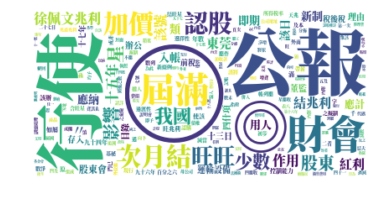

In [364]:
wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",
                      background_color="white",
                      max_words=2000,
                      stopwords=stopwords).generate_from_frequencies(dictof201204)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

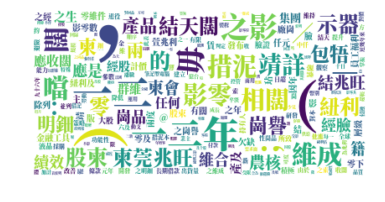

In [360]:
wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",
                      background_color="white",
                      max_words=2000,
                      stopwords=stopwords).generate_from_frequencies(dictof201404)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

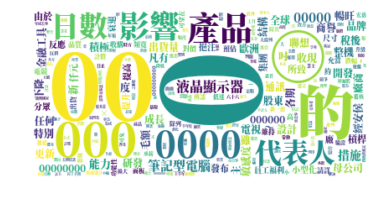

In [361]:
wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",
                      background_color="white",
                      max_words=2000,
                      stopwords=stopwords).generate_from_frequencies(dictof201504)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

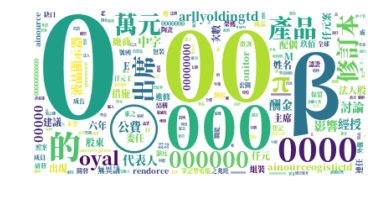

In [362]:
wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",
                      background_color="white",
                      max_words=2000,
                      stopwords=stopwords).generate_from_frequencies(dictof201604)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

資料不是很乾淨, 決定使用自己找得資料!